# Предобработка датасета "Company Financials"

Датасет взят [отсюда](https://www.kaggle.com/datasets/atharvaarya25/financials). Из описания:

> A dataset consisting of sales and profit data sorted by market segment and country/region.

> Датасет, состоящий из информации о продажах и доходах, отсортированный по сегменту рынка и стране/региону.


## Импорт необходимых библиотек и загрузка датасета

Для обработки датасета импортирую pandas и numpy; для визуализации – модуль pyplot из matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('financials.csv')
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


## Обзор столбцов

Посмотрим информацию о столбцах в таблице.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

Предположу, как расшифровываются столбцы:
- Segment: сегмент рынка
- Country: страна (или регион, если верить описанию?)
- Product: проданный продукт
- Discount Band: группа величины скидки (наверное, зависит от сегмента рынка и страны)
- Units Sold: количество проданных продуктов
- Manufacturing Price: стоимость производства одной единицы продукта
- Sale Price: цена одной единицы продукта
- Gross Sales: общая стоимость до вычета скидок
- Discounts: величина скидки
- Sales: итоговая стоимость
- COGS: (Cost Of Goods Sold) общие затраты на производство
- Profit: прибыль
- Date: дата (сделки?)
- Month Number: порядковый номер месяца
- Month Name: название месяца
- Year: год

В глаза сразу бросаются несколько проблем:
1. Названия столбцов не соответствуют принципам snake_case (да еще и содержат whitespace'ы. кажется).
2. Многие столбцы имеют тип object, а не соответствующий им (Units Sold, Manufacturing Price, Date...).
3. Пропущенных значений нет, но пустые значения заполнены чем-то непонятным.
4. Столбцы Date, Month Number, Month Name, Year содержат дублирующуюся информацию, которая может приводить к противоречиям.

Это пока все, что я вижу. Начнем с переименования столбцов.

In [ ]:
data = data.rename(
    columns={x:x.strip().lower().replace(' ', '_') for x in data.columns}
)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   segment              700 non-null    object
 1   country              700 non-null    object
 2   product              700 non-null    object
 3   discount_band        700 non-null    object
 4   units_sold           700 non-null    object
 5   manufacturing_price  700 non-null    object
 6   sale_price           700 non-null    object
 7   gross_sales          700 non-null    object
 8   discounts            700 non-null    object
 9   sales                700 non-null    object
 10  cogs                 700 non-null    object
 11  profit               700 non-null    object
 12  date                 700 non-null    object
 13  month_number         700 non-null    int64 
 14  month_name           700 non-null    object
 15  year                 700 non-null    int64 
dtypes: int64

## Работа со столбцами

Будем брать столбцы по одному и смотреть, что с ними происходит.

### segment

In [ ]:
display(data['segment'])

0            Government
1            Government
2             Midmarket
3             Midmarket
4             Midmarket
             ...       
695      Small Business
696      Small Business
697          Government
698          Government
699    Channel Partners
Name: segment, Length: 700, dtype: object

Посмотрим, какие есть уникальные значения, и сколько раз они встречаются.

In [ ]:
data['segment'].unique()

array(['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business'], dtype=object)

In [ ]:
data['segment'].value_counts()

segment
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: count, dtype: int64

In [ ]:
data['segment'].isna().sum()

0

Вроде бы здесь ничего особенного. Двигаемся дальше.

### country

In [ ]:
display(data['country'])

0                        Canada
1                       Germany
2                        France
3                       Germany
4                        Mexico
                 ...           
695                      France
696                      Mexico
697                      Mexico
698                      Canada
699    United States of America
Name: country, Length: 700, dtype: object

In [ ]:
data['country'].unique()

array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

In [ ]:
data['country'].value_counts()

country
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: count, dtype: int64

In [ ]:
data['country'].isna().sum()

0

Тут вроде все тоже в порядке. Даже нет никаких регионов, только страны.

### product

In [ ]:
display(data['product'])

0       Carretera 
1       Carretera 
2       Carretera 
3       Carretera 
4       Carretera 
          ...     
695      Amarilla 
696      Amarilla 
697       Montana 
698         Paseo 
699           VTT 
Name: product, Length: 700, dtype: object

In [ ]:
data['product'].unique()

array([' Carretera ', ' Montana ', ' Paseo ', ' Velo ', ' VTT ',
       ' Amarilla '], dtype=object)

In [ ]:
data['product'].value_counts()

product
 Paseo         202
 Velo          109
 VTT           109
 Amarilla       94
 Carretera      93
 Montana        93
Name: count, dtype: int64

In [ ]:
data['product'].isna().sum()

0

Названия продуктов содержат whitespace'ы, в остальном все вроде ок. Избавимся от них.

In [ ]:
data['product'] = (data['product']
                   .str.strip())
data['product'].unique()

array(['Carretera', 'Montana', 'Paseo', 'Velo', 'VTT', 'Amarilla'],
      dtype=object)

### discount_band

In [ ]:
display(data['discount_band'])

0       None 
1       None 
2       None 
3       None 
4       None 
        ...  
695     High 
696     High 
697     High 
698     High 
699     High 
Name: discount_band, Length: 700, dtype: object

In [ ]:
data['discount_band'].unique()

array([' None ', ' Low ', ' Medium ', ' High '], dtype=object)

In [ ]:
data['discount_band'].value_counts()

discount_band
 High       245
 Medium     242
 Low        160
 None        53
Name: count, dtype: int64

In [ ]:
data['discount_band'].isna().sum()

0

Нас продолжают троллить whitespace'ами. Уберем их аналогично product.

In [ ]:
data['discount_band'] = (data['discount_band']
                   .str.strip())
data['discount_band'].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

### units_sold

In [ ]:
display(data['units_sold'])

0       $1,618.50 
1       $1,321.00 
2       $2,178.00 
3         $888.00 
4       $2,470.00 
          ...     
695     $2,475.00 
696       $546.00 
697     $1,368.00 
698       $723.00 
699     $1,806.00 
Name: units_sold, Length: 700, dtype: object

In [ ]:
data['units_sold'].isna().sum()

0

Весело: мало того, что количество в долларах, так еще и по полштуки что-то продается.

In [ ]:
data['units_sold'].unique()

array([' $1,618.50 ', ' $1,321.00 ', ' $2,178.00 ', ' $888.00 ',
       ' $2,470.00 ', ' $1,513.00 ', ' $921.00 ', ' $2,518.00 ',
       ' $1,899.00 ', ' $1,545.00 ', ' $2,665.50 ', ' $958.00 ',
       ' $2,146.00 ', ' $345.00 ', ' $615.00 ', ' $292.00 ', ' $974.00 ',
       ' $1,006.00 ', ' $367.00 ', ' $883.00 ', ' $549.00 ', ' $788.00 ',
       ' $2,472.00 ', ' $1,143.00 ', ' $1,725.00 ', ' $912.00 ',
       ' $2,152.00 ', ' $1,817.00 ', ' $1,493.00 ', ' $1,804.00 ',
       ' $2,161.00 ', ' $2,821.00 ', ' $2,001.00 ', ' $2,838.00 ',
       ' $1,527.00 ', ' $2,151.00 ', ' $2,750.00 ', ' $1,953.00 ',
       ' $4,219.50 ', ' $1,686.00 ', ' $2,141.00 ', ' $3,945.00 ',
       ' $2,296.00 ', ' $1,030.00 ', ' $639.00 ', ' $1,326.00 ',
       ' $1,858.00 ', ' $1,210.00 ', ' $2,529.00 ', ' $1,445.00 ',
       ' $330.00 ', ' $2,671.00 ', ' $766.00 ', ' $494.00 ',
       ' $1,397.00 ', ' $2,155.00 ', ' $2,214.00 ', ' $2,301.00 ',
       ' $1,375.50 ', ' $1,830.00 ', ' $2,498.00 ', ' $663.00 ',

Whitespace, знаки доллара и разделители-запятые нам не нужны.

In [ ]:
data['units_sold'] = (data['units_sold']
                      .str.strip()
                      .str.replace('$','')
                      .str.replace(',',''))
data['units_sold'].unique()

array(['1618.50', '1321.00', '2178.00', '888.00', '2470.00', '1513.00',
       '921.00', '2518.00', '1899.00', '1545.00', '2665.50', '958.00',
       '2146.00', '345.00', '615.00', '292.00', '974.00', '1006.00',
       '367.00', '883.00', '549.00', '788.00', '2472.00', '1143.00',
       '1725.00', '912.00', '2152.00', '1817.00', '1493.00', '1804.00',
       '2161.00', '2821.00', '2001.00', '2838.00', '1527.00', '2151.00',
       '2750.00', '1953.00', '4219.50', '1686.00', '2141.00', '3945.00',
       '2296.00', '1030.00', '639.00', '1326.00', '1858.00', '1210.00',
       '2529.00', '1445.00', '330.00', '2671.00', '766.00', '494.00',
       '1397.00', '2155.00', '2214.00', '2301.00', '1375.50', '1830.00',
       '2498.00', '663.00', '1514.00', '4492.50', '727.00', '787.00',
       '1823.00', '747.00', '2905.00', '3864.00', '362.00', '923.00',
       '2092.00', '263.00', '943.50', '986.00', '1744.00', '1989.00',
       '321.00', '742.50', '1295.00', '214.00', '2145.00', '2852.00',
      

Сменим тип данных на float.

In [ ]:
data['units_sold'] = data['units_sold'].astype('float')
data['units_sold'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 700 entries, 0 to 699
Series name: units_sold
Non-Null Count  Dtype  
--------------  -----  
700 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


In [ ]:
test_units_data = data['units_sold'].where(data['units_sold'] % 1.0 != 0, None)
test_units_data.value_counts()

units_sold
1618.5    1
2665.5    1
3793.5    1
1351.5    1
1630.5    1
3445.5    1
3520.5    1
3199.5    1
2104.5    1
2425.5    1
3874.5    1
3421.5    1
2521.5    1
982.5     1
1438.5    1
3997.5    1
2227.5    1
3802.5    1
436.5     1
574.5     1
2434.5    1
4219.5    1
1375.5    1
4492.5    1
943.5     1
742.5     1
4243.5    1
1369.5    1
3244.5    1
3850.5    1
1414.5    1
1384.5    1
1117.5    1
1987.5    1
1738.5    1
865.5     1
Name: count, dtype: int64

In [ ]:
test_units_data.unique().shape[0]

37

37 из 700 – это около 5%. Можно предположить, что это ошибка в записях, но я предположу, что это что-то значит, и не буду избавляться от дробных частей. В том числе это имеет смысл, чтобы сходились вычисления доходов и прибыли.

### manufacturing_price

In [ ]:
data['manufacturing_price'].unique()

array([' $3.00 ', ' $5.00 ', ' $10.00 ', ' $120.00 ', ' $250.00 ',
       ' $260.00 '], dtype=object)

In [ ]:
data['manufacturing_price'].value_counts()

manufacturing_price
 $10.00      202
 $120.00     109
 $250.00     109
 $260.00      94
 $3.00        93
 $5.00        93
Name: count, dtype: int64

In [ ]:
data['manufacturing_price'].isna().sum()

0

In [ ]:
product_prices = {x:data.loc[data['product'] == x, 'manufacturing_price'] for x in data['product'].unique()}
product_prices

{'Carretera': 0       $3.00 
 1       $3.00 
 2       $3.00 
 3       $3.00 
 4       $3.00 
         ...   
 630     $3.00 
 631     $3.00 
 666     $3.00 
 667     $3.00 
 668     $3.00 
 Name: manufacturing_price, Length: 93, dtype: object,
 'Montana': 6       $5.00 
 7       $5.00 
 8       $5.00 
 9       $5.00 
 10      $5.00 
         ...   
 635     $5.00 
 636     $5.00 
 637     $5.00 
 669     $5.00 
 697     $5.00 
 Name: manufacturing_price, Length: 93, dtype: object,
 'Paseo': 16      $10.00 
 17      $10.00 
 18      $10.00 
 19      $10.00 
 20      $10.00 
          ...   
 678     $10.00 
 679     $10.00 
 680     $10.00 
 681     $10.00 
 698     $10.00 
 Name: manufacturing_price, Length: 202, dtype: object,
 'Velo': 31      $120.00 
 32      $120.00 
 33      $120.00 
 34      $120.00 
 35      $120.00 
          ...    
 683     $120.00 
 684     $120.00 
 685     $120.00 
 686     $120.00 
 687     $120.00 
 Name: manufacturing_price, Length: 109, dtype: object,


Числовые значения цен на производство совпадают с проданными продуктами. Сами цены содержат whitespace'ы и знаки доллара, так что избавимся от них и перейдем к типу float.

In [ ]:
data['manufacturing_price'] = (data['manufacturing_price']
                      .str.strip()
                      .str.replace('$','')).astype('float')
data['manufacturing_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 700 entries, 0 to 699
Series name: manufacturing_price
Non-Null Count  Dtype  
--------------  -----  
700 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


### sale_price

In [ ]:
data['sale_price'].unique()

array([' $20.00 ', ' $15.00 ', ' $350.00 ', ' $12.00 ', ' $125.00 ',
       ' $300.00 ', ' $7.00 '], dtype=object)

In [ ]:
data['sale_price'].value_counts()

sale_price
 $20.00      100
 $15.00      100
 $350.00     100
 $12.00      100
 $125.00     100
 $300.00     100
 $7.00       100
Name: count, dtype: int64

In [ ]:
data['sale_price'].isna().sum()

0

Уберем whitespace и знаки долларов, преобразуем тип в float.

In [ ]:
data['sale_price'] = (data['sale_price']
                      .str.strip()
                      .str.replace('$','')).astype('float')
data['sale_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 700 entries, 0 to 699
Series name: sale_price
Non-Null Count  Dtype  
--------------  -----  
700 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


In [ ]:
for x in data['product'].unique():
  print(x,':\n', data.loc[data['product'] == x, 'sale_price'].describe(), '\n', sep='')

Carretera:
count     93.000000
mean     111.774194
std      133.235745
min        7.000000
25%       12.000000
50%       20.000000
75%      300.000000
max      350.000000
Name: sale_price, dtype: float64

Montana:
count     93.000000
mean     117.096774
std      137.620545
min        7.000000
25%       12.000000
50%       20.000000
75%      300.000000
max      350.000000
Name: sale_price, dtype: float64

Paseo:
count    202.000000
mean     108.178218
std      133.708184
min        7.000000
25%       12.000000
50%       20.000000
75%      300.000000
max      350.000000
Name: sale_price, dtype: float64

Velo:
count    109.000000
mean     115.238532
std      131.538820
min        7.000000
25%       12.000000
50%       20.000000
75%      300.000000
max      350.000000
Name: sale_price, dtype: float64

VTT:
count    109.000000
mean     138.587156
std      143.749539
min        7.000000
25%       12.000000
50%       20.000000
75%      300.000000
max      350.000000
Name: sale_price, dtype: f

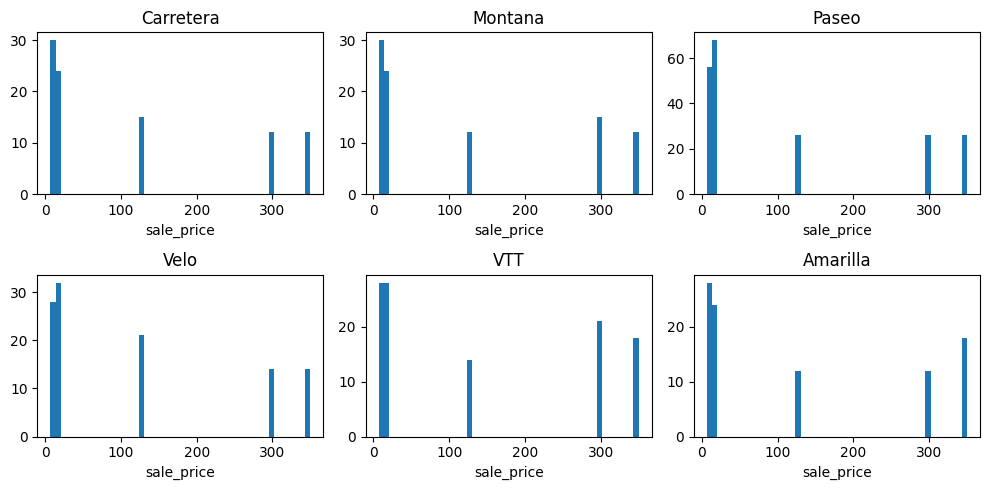

In [ ]:
# Я сошел с ума, пока редактировал эту функцию. Делал по образцу из Интернета. Что здесь происходит:
fig, axs = plt.subplots(2, 3, figsize=(10, 5)) # создаем график, на котором будут подграфики (2 ряда по три штуки размером 10 на 5)
for i in range(2): # итерация по ряду
  for j in range(3): # итерация по номеру в ряду
    '''
    На j-м подграфике в i-м ряду строим гистограмму из набора данных, полученного из нашей таблицы data отбором значений sale_price
    для тех строк, где значение product равно названию одного из продуктов. Название продукта мы получаем по порядковому номеру из
    data['product'].unique()
    '''
    axs[i][j].hist(data.loc[data['product'] == data['product'].unique()[i*3+j], 'sale_price'], bins=50) # число 50 чисто магическое, подобрал его
    axs[i][j].set_title(data['product'].unique()[i*3+j]) # устанавливаем название продукта в качестве заголовка подграфика
    axs[i][j].set_xlabel('sale_price') # подписываем абсциссу
  plt.tight_layout() # эта функция предотвращает наложение графиков друг на друга

По этим графикам видно, что явных выбросов нет. Судя по всему, цена на продукты зависит от сегмента, к которому принадлежит покупатель.

### gross_sales

Поскольку gross_sales – это общая стоимость (до скидок), получать список уникальных значений не очень полезно. Сначала избавимся от пробелов, долларов и запятых.

In [ ]:
data['gross_sales'] = (data['gross_sales']
                      .str.strip()
                      .str.replace('$','')
                      .str.replace(',','')).astype('float')
data['gross_sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 700 entries, 0 to 699
Series name: gross_sales
Non-Null Count  Dtype  
--------------  -----  
700 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


In [ ]:
data['gross_sales'].describe()

count    7.000000e+02
mean     1.827594e+05
std      2.542623e+05
min      1.799000e+03
25%      1.739175e+04
50%      3.798000e+04
75%      2.790250e+05
max      1.207500e+06
Name: gross_sales, dtype: float64

Построим график и посмотрим на значения. Я не люблю нормализованное представление чисел на графике, поэтому использую функцию форматирования.

(array([447.,  57.,  63.,  37.,  27.,  21.,  27.,   8.,  10.,   3.]),
 array([   1799. ,  122369.1,  242939.2,  363509.3,  484079.4,  604649.5,
         725219.6,  845789.7,  966359.8, 1086929.9, 1207500. ]),
 <BarContainer object of 10 artists>)

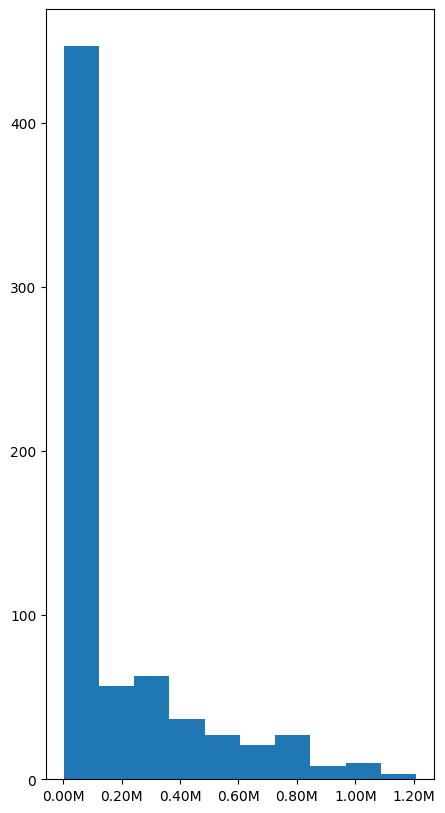

In [ ]:
from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    return f'{x / 1000000:.2f}M'

fig, ax = plt.subplots(figsize=(5, 10))
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.hist(data['gross_sales'])

Ничего плохого здесь не вижу. Проверим, везде ли произведение количества проданных единиц на цену продукта равно величине gross_sales.

In [ ]:
bad_math = data.mask(data['units_sold']*data['sale_price'] == data['gross_sales'])
bad_math[bad_math['gross_sales'].notna()]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year


Все в порядке. Двигаемся дальше.

### discounts

In [ ]:
data['discounts'].unique()

array([' $-   ', ' $276.15 ', ' $344.40 ', ' $72.10 ', ' $44.73 ',
       ' $92.82 ', ' $222.96 ', ' $4,235.00 ', ' $177.03 ', ' $173.40 ',
       ' $412.50 ', ' $320.52 ', ' $91.92 ', ' $1,482.00 ', ' $4,889.50 ',
       ' $7,542.50 ', ' $332.10 ', ' $6,903.00 ', ' $275.10 ',
       ' $128.10 ', ' $7,494.00 ', ' $828.75 ', ' $227.10 ', ' $314.48 ',
       ' $908.75 ', ' $983.75 ', ' $2,278.75 ', ' $112.05 ',
       ' $8,715.00 ', ' $772.80 ', ' $25.34 ', ' $1,153.75 ', ' $146.44 ',
       ' $18.41 ', ' $3,302.25 ', ' $2,958.00 ', ' $2,180.00 ',
       ' $238.68 ', ' $48.15 ', ' $1,856.25 ', ' $310.80 ', ' $1,284.00 ',
       ' $300.30 ', ' $19,964.00 ', ' $274.08 ', ' $626.40 ', ' $165.60 ',
       ' $4,150.00 ', ' $708.90 ', ' $5,508.00 ', ' $10,368.00 ',
       ' $1,655.00 ', ' $2,022.50 ', ' $5,362.50 ', ' $428.40 ',
       ' $11,496.00 ', ' $6,822.50 ', ' $577.50 ', ' $281.82 ',
       ' $253.20 ', ' $260.16 ', ' $20,762.00 ', ' $20,139.00 ',
       ' $217.60 ', ' $1,862.00 ', ' $

Здесь мы впервые столкнемся с пропущенными значениями для тех случаев, когда нет скидки. Точнее, эти пропущенные значения появятся, когда мы избавимся от whitespace, долларов, запятых и дефисов.

In [ ]:
data['discounts'] = (data['discounts']
                      .str.strip()
                      .str.replace('$','')
                      .str.replace(',','')
                      .str.replace('-',''))
data['discounts'].unique()

array(['', '276.15', '344.40', '72.10', '44.73', '92.82', '222.96',
       '4235.00', '177.03', '173.40', '412.50', '320.52', '91.92',
       '1482.00', '4889.50', '7542.50', '332.10', '6903.00', '275.10',
       '128.10', '7494.00', '828.75', '227.10', '314.48', '908.75',
       '983.75', '2278.75', '112.05', '8715.00', '772.80', '25.34',
       '1153.75', '146.44', '18.41', '3302.25', '2958.00', '2180.00',
       '238.68', '48.15', '1856.25', '310.80', '1284.00', '300.30',
       '19964.00', '274.08', '626.40', '165.60', '4150.00', '708.90',
       '5508.00', '10368.00', '1655.00', '2022.50', '5362.50', '428.40',
       '11496.00', '6822.50', '577.50', '281.82', '253.20', '260.16',
       '20762.00', '20139.00', '217.60', '1862.00', '13580.00', '1554.00',
       '6606.00', '5690.00', '494.40', '376.40', '15913.13', '1548.00',
       '6201.00', '700.92', '326.88', '411.18', '684.36', '114.24',
       '18868.50', '4826.25', '6397.50', '21910.50', '6652.50', '5887.50',
       '493.02', 

Теперь заменим все пустые строки нулями и приведем к типу данных float.

In [ ]:
data['discounts'] = data['discounts'].where(data['discounts']!='', '0').astype('float')
data['discounts'].unique()

array([0.000000e+00, 2.761500e+02, 3.444000e+02, 7.210000e+01,
       4.473000e+01, 9.282000e+01, 2.229600e+02, 4.235000e+03,
       1.770300e+02, 1.734000e+02, 4.125000e+02, 3.205200e+02,
       9.192000e+01, 1.482000e+03, 4.889500e+03, 7.542500e+03,
       3.321000e+02, 6.903000e+03, 2.751000e+02, 1.281000e+02,
       7.494000e+03, 8.287500e+02, 2.271000e+02, 3.144800e+02,
       9.087500e+02, 9.837500e+02, 2.278750e+03, 1.120500e+02,
       8.715000e+03, 7.728000e+02, 2.534000e+01, 1.153750e+03,
       1.464400e+02, 1.841000e+01, 3.302250e+03, 2.958000e+03,
       2.180000e+03, 2.386800e+02, 4.815000e+01, 1.856250e+03,
       3.108000e+02, 1.284000e+03, 3.003000e+02, 1.996400e+04,
       2.740800e+02, 6.264000e+02, 1.656000e+02, 4.150000e+03,
       7.089000e+02, 5.508000e+03, 1.036800e+04, 1.655000e+03,
       2.022500e+03, 5.362500e+03, 4.284000e+02, 1.149600e+04,
       6.822500e+03, 5.775000e+02, 2.818200e+02, 2.532000e+02,
       2.601600e+02, 2.076200e+04, 2.013900e+04, 2.1760

In [ ]:
data['discounts'].describe()

count       700.000000
mean      13150.354671
std       22962.928760
min           0.000000
25%         800.320000
50%        2585.250000
75%       15956.347500
max      149677.500000
Name: discounts, dtype: float64

(array([519.,  75.,  48.,  20.,  13.,   7.,   7.,   7.,   3.,   1.]),
 array([     0.  ,  14967.75,  29935.5 ,  44903.25,  59871.  ,  74838.75,
         89806.5 , 104774.25, 119742.  , 134709.75, 149677.5 ]),
 <BarContainer object of 10 artists>)

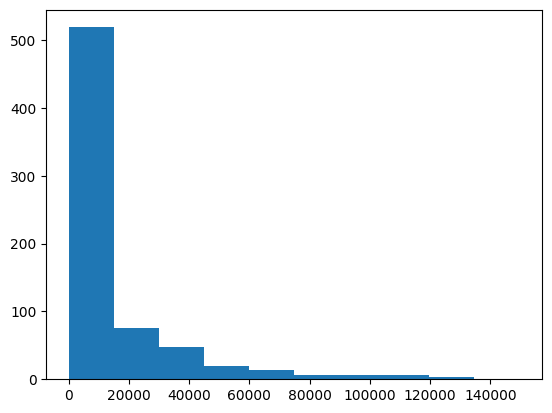

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['discounts'])

### sales

In [ ]:
data['sales'].unique()

array([' $32,370.00 ', ' $26,420.00 ', ' $32,670.00 ', ' $13,320.00 ',
       ' $37,050.00 ', ' $5,29,550.00 ', ' $13,815.00 ', ' $30,216.00 ',
       ' $37,980.00 ', ' $18,540.00 ', ' $3,33,187.50 ', ' $2,87,400.00 ',
       ' $15,022.00 ', ' $43,125.00 ', ' $9,225.00 ', ' $5,840.00 ',
       ' $14,610.00 ', ' $3,52,100.00 ', ' $4,404.00 ', ' $6,181.00 ',
       ' $8,235.00 ', ' $2,36,400.00 ', ' $37,080.00 ', ' $8,001.00 ',
       ' $6,03,750.00 ', ' $10,944.00 ', ' $32,280.00 ', ' $36,340.00 ',
       ' $10,451.00 ', ' $2,25,500.00 ', ' $25,932.00 ', ' $3,52,625.00 ',
       ' $6,00,300.00 ', ' $34,056.00 ', ' $5,34,450.00 ',
       ' $6,45,300.00 ', ' $9,62,500.00 ', ' $23,436.00 ',
       ' $5,27,437.50 ', ' $11,802.00 ', ' $25,692.00 ', ' $27,338.85 ',
       ' $34,095.60 ', ' $7,137.90 ', ' $4,428.27 ', ' $9,189.18 ',
       ' $22,073.04 ', ' $4,19,265.00 ', ' $17,525.97 ', ' $17,166.60 ',
       ' $40,837.50 ', ' $31,731.48 ', ' $9,100.08 ', ' $1,46,718.00 ',
       ' $4,84,060

In [ ]:
data['sales'].isna().sum()

0

Убираем whitespace, запятые и доллары, меняем тип на float.

In [ ]:
data['sales'] = (data['sales']
                      .str.strip()
                      .str.replace('$','')
                      .str.replace(',','')).astype('float')
data['sales'].unique()

array([  32370.  ,   26420.  ,   32670.  ,   13320.  ,   37050.  ,
        529550.  ,   13815.  ,   30216.  ,   37980.  ,   18540.  ,
        333187.5 ,  287400.  ,   15022.  ,   43125.  ,    9225.  ,
          5840.  ,   14610.  ,  352100.  ,    4404.  ,    6181.  ,
          8235.  ,  236400.  ,   37080.  ,    8001.  ,  603750.  ,
         10944.  ,   32280.  ,   36340.  ,   10451.  ,  225500.  ,
         25932.  ,  352625.  ,  600300.  ,   34056.  ,  534450.  ,
        645300.  ,  962500.  ,   23436.  ,  527437.5 ,   11802.  ,
         25692.  ,   27338.85,   34095.6 ,    7137.9 ,    4428.27,
          9189.18,   22073.04,  419265.  ,   17525.97,   17166.6 ,
         40837.5 ,   31731.48,    9100.08,  146718.  ,  484060.5 ,
        746707.5 ,   32877.9 ,  683397.  ,   27234.9 ,   12681.9 ,
        741906.  ,   82046.25,   22482.9 ,   31133.03,   89966.25,
         97391.25,  225596.25,   11092.95,  862785.  ,   76507.2 ,
          2508.66,  114221.25,   14497.56,    1822.59,  326922

Снова проверим вычисления: разность gross_sales и discounts должна быть равна sales.

In [ ]:
bad_math = data.mask(data['gross_sales']-data['discounts'] == data['sales'])
bad_math[bad_math['sales'].notna()]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
75,Government,United States of America,Paseo,Low,4492.5,10.0,7.0,31447.5,314.48,31133.03,"$22,462.50","$8,670.53",01/04/2014,4.0,April,2014.0
144,Enterprise,France,Carretera,Low,4243.5,3.0,125.0,530437.5,15913.13,514524.38,"$5,09,220.00","$5,304.38",01/04/2014,4.0,April,2014.0
320,Government,United States of America,Velo,Medium,547.0,120.0,7.0,3829.0,268.03,3560.97,"$2,735.00",$825.97,01/11/2014,11.0,November,2014.0
357,Government,Canada,Montana,Medium,488.0,5.0,7.0,3416.0,273.28,3142.72,"$2,440.00",$702.72,01/02/2014,2.0,February,2014.0
453,Midmarket,Canada,Amarilla,Medium,1630.5,260.0,15.0,24457.5,2201.18,22256.33,"$16,305.00","$5,951.33",01/07/2014,7.0,July,2014.0
501,Midmarket,United States of America,Amarilla,High,3199.5,260.0,15.0,47992.5,5279.18,42713.33,"$31,995.00","$10,718.33",01/07/2014,7.0,July,2014.0
586,Government,United States of America,Paseo,High,1438.5,10.0,7.0,10069.5,1309.04,8760.47,"$7,192.50","$1,567.97",01/01/2014,1.0,January,2014.0
598,Midmarket,France,Velo,High,3997.5,120.0,15.0,59962.5,7795.13,52167.38,"$39,975.00","$12,192.38",01/01/2014,1.0,January,2014.0
616,Government,France,Montana,High,293.0,5.0,7.0,2051.0,287.14,1763.86,"$1,465.00",$298.86,01/02/2014,2.0,February,2014.0
642,Government,France,Paseo,High,1731.0,10.0,7.0,12117.0,1696.38,10420.62,"$8,655.00","$1,765.62",01/10/2014,10.0,October,2014.0


In [ ]:
bad_math[bad_math['sales'].notna()].shape[0]

11

Среди этих 11 несовпадающих записей есть как ошибки вычисления, так и ошибки в исходных данных. Сравним два случая:

In [ ]:
# ошибка в исходных данных
[data.at[75,'gross_sales']-data.at[75,'discounts'], data.at[75,'sales']]

[31133.02, 31133.03]

In [ ]:
# вычислительная ошибка
[data.at[320,'gross_sales']-data.at[320,'discounts'], data.at[320,'sales']]

[3560.9700000000003, 3560.97]

В принципе, учитывая, что это 11 случаев из 700 (1.6%), проще всего удалить эти строки из таблицы. На всякий случай сохраним их.

In [ ]:
excluded_rows = bad_math[bad_math['sales'].notna()]
data = data.where(data['gross_sales']-data['discounts'] == data['sales'])
data = data[data['sales'].notna()]
data

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,"$16,185.00","$16,185.00",01/01/2014,1.0,January,2014.0
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,"$13,210.00","$13,210.00",01/01/2014,1.0,January,2014.0
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,"$21,780.00","$10,890.00",01/06/2014,6.0,June,2014.0
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,"$8,880.00","$4,440.00",01/06/2014,6.0,June,2014.0
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,"$24,700.00","$12,350.00",01/06/2014,6.0,June,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,"$6,18,750.00","$12,375.00",01/03/2014,3.0,March,2014.0
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,"$1,36,500.00","$2,730.00",01/10/2014,10.0,October,2014.0
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,"$6,840.00","$1,299.60",01/02/2014,2.0,February,2014.0
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,"$3,615.00",$686.85,01/04/2014,4.0,April,2014.0


### cogs

In [ ]:
data['cogs'].unique()

array([' $16,185.00 ', ' $13,210.00 ', ' $21,780.00 ', ' $8,880.00 ',
       ' $24,700.00 ', ' $3,93,380.00 ', ' $9,210.00 ', ' $7,554.00 ',
       ' $18,990.00 ', ' $4,635.00 ', ' $3,19,860.00 ', ' $2,39,500.00 ',
       ' $10,730.00 ', ' $41,400.00 ', ' $6,150.00 ', ' $2,920.00 ',
       ' $9,740.00 ', ' $2,61,560.00 ', ' $1,101.00 ', ' $4,415.00 ',
       ' $5,490.00 ', ' $1,97,000.00 ', ' $24,720.00 ', ' $5,715.00 ',
       ' $4,48,500.00 ', ' $2,736.00 ', ' $21,520.00 ', ' $18,170.00 ',
       ' $7,465.00 ', ' $2,16,480.00 ', ' $6,483.00 ', ' $3,38,520.00 ',
       ' $5,00,250.00 ', ' $8,514.00 ', ' $3,97,020.00 ',
       ' $5,37,750.00 ', ' $7,15,000.00 ', ' $5,859.00 ',
       ' $5,06,340.00 ', ' $8,430.00 ', ' $6,423.00 ', ' $19,725.00 ',
       ' $22,960.00 ', ' $5,150.00 ', ' $3,195.00 ', ' $6,630.00 ',
       ' $5,574.00 ', ' $3,14,600.00 ', ' $12,645.00 ', ' $4,335.00 ',
       ' $39,600.00 ', ' $8,013.00 ', ' $2,298.00 ', ' $1,23,500.00 ',
       ' $3,63,220.00 ', ' $5,60,

In [ ]:
data['cogs'].isna().sum()

0

In [ ]:
data['cogs'] = (data['cogs']
                      .str.strip()
                      .str.replace('$','')
                      .str.replace(',','')).astype('float')
data['cogs'].describe()

count       689.000000
mean     146852.754717
std      204398.091031
min         918.000000
25%        7554.000000
50%       22960.000000
75%      247750.000000
max      950625.000000
Name: cogs, dtype: float64

Предположу, что общие затраты на производство должны равняться произведению manufacturing_price и units_sold. Проверим это.

In [ ]:
bad_math = data.mask(data['manufacturing_price'] * data['units_sold'] == data['cogs'])
bad_math[bad_math['cogs'].notna()]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,"$16,185.00",01/01/2014,1.0,January,2014.0
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,"$13,210.00",01/01/2014,1.0,January,2014.0
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,"$10,890.00",01/06/2014,6.0,June,2014.0
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,"$4,440.00",01/06/2014,6.0,June,2014.0
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,"$12,350.00",01/06/2014,6.0,June,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,Government,France,VTT,High,293.0,250.0,20.0,5860.0,879.00,4981.00,2930.0,"$2,051.00",01/12/2014,12.0,December,2014.0
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,"$12,375.00",01/03/2014,3.0,March,2014.0
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,"$2,730.00",01/10/2014,10.0,October,2014.0
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,$686.85,01/04/2014,4.0,April,2014.0


Ого. Видимо, COGS считается не просто как произведение manufacturing_price и units_sold, 527 из 777 – это слишком много ошибок. Возможно, в COGS входят расходы, не связанные с производством (зарплаты и др.)?
Как бы то ни было, в таком случае удалять значения из таблицы не будем.

### profit

In [ ]:
data['profit'].isna().sum()

0

In [ ]:
data['profit'].unique()

array([' $16,185.00 ', ' $13,210.00 ', ' $10,890.00 ', ' $4,440.00 ',
       ' $12,350.00 ', ' $1,36,170.00 ', ' $4,605.00 ', ' $22,662.00 ',
       ' $18,990.00 ', ' $13,905.00 ', ' $13,327.50 ', ' $47,900.00 ',
       ' $4,292.00 ', ' $1,725.00 ', ' $3,075.00 ', ' $2,920.00 ',
       ' $4,870.00 ', ' $90,540.00 ', ' $3,303.00 ', ' $1,766.00 ',
       ' $2,745.00 ', ' $39,400.00 ', ' $12,360.00 ', ' $2,286.00 ',
       ' $1,55,250.00 ', ' $8,208.00 ', ' $10,760.00 ', ' $18,170.00 ',
       ' $2,986.00 ', ' $9,020.00 ', ' $19,449.00 ', ' $14,105.00 ',
       ' $1,00,050.00 ', ' $25,542.00 ', ' $1,37,430.00 ',
       ' $1,07,550.00 ', ' $2,47,500.00 ', ' $17,577.00 ', ' $21,097.50 ',
       ' $3,372.00 ', ' $19,269.00 ', ' $7,613.85 ', ' $11,135.60 ',
       ' $1,987.90 ', ' $1,233.27 ', ' $2,559.18 ', ' $16,499.04 ',
       ' $1,04,665.00 ', ' $4,880.97 ', ' $12,831.60 ', ' $1,237.50 ',
       ' $23,718.48 ', ' $6,802.08 ', ' $23,218.00 ', ' $1,20,840.50 ',
       ' $1,86,407.50 ', ' $

Ага, у нас есть пустые значения `' $-   '`. А почему некоторые значения в скобках? Посмотрим повнимательнее.

In [ ]:
data[data['profit'].str.contains('\(')]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
232,Enterprise,United States of America,Montana,Medium,3627.0,5.0,125.0,453375.0,22668.75,430706.25,435240.0,"$(4,533.75)",01/07/2014,7.0,July,2014.0
237,Enterprise,United States of America,Paseo,Medium,2992.0,10.0,125.0,374000.0,18700.00,355300.00,359040.0,"$(3,740.00)",01/03/2014,3.0,March,2014.0
238,Enterprise,France,Paseo,Medium,2385.0,10.0,125.0,298125.0,14906.25,283218.75,286200.0,"$(2,981.25)",01/03/2014,3.0,March,2014.0
246,Enterprise,United States of America,Paseo,Medium,861.0,10.0,125.0,107625.0,5381.25,102243.75,103320.0,"$(1,076.25)",01/10/2014,10.0,October,2014.0
247,Enterprise,France,Paseo,Medium,704.0,10.0,125.0,88000.0,4400.00,83600.00,84480.0,$(880.00),01/10/2013,10.0,October,2013.0
254,Enterprise,Germany,Velo,Medium,807.0,120.0,125.0,100875.0,5043.75,95831.25,96840.0,"$(1,008.75)",01/02/2014,2.0,February,2014.0
258,Enterprise,United States of America,Velo,Medium,861.0,120.0,125.0,107625.0,5381.25,102243.75,103320.0,"$(1,076.25)",01/10/2014,10.0,October,2014.0
259,Enterprise,France,Velo,Medium,704.0,120.0,125.0,88000.0,4400.00,83600.00,84480.0,$(880.00),01/10/2013,10.0,October,2013.0
279,Enterprise,Germany,Carretera,Medium,887.0,3.0,125.0,110875.0,6652.50,104222.50,106440.0,"$(2,217.50)",01/12/2013,12.0,December,2013.0
287,Enterprise,Canada,Velo,Medium,952.0,120.0,125.0,119000.0,7140.00,111860.00,114240.0,"$(2,380.00)",01/02/2014,2.0,February,2014.0


Понятно, в скобках обозначены отрицательные значения. План действий:
1. Избавимся от whitespace, долларов и запятых;
2. На месте минусов расставим нули;
3. На месте открывающих скобок поставим минусы, а закрывающие просто уберем;
4. Переведем в float.

In [ ]:
data['profit'] = (data['profit']
                      .str.strip()
                      .str.replace('$','')
                      .str.replace(',','')
                      .str.replace('-','0')
                      .str.replace('(','-')
                      .str.replace(')','')).astype('float')
data['profit'].describe()

count       689.000000
mean      24446.935530
std       43025.423474
min      -40617.500000
25%        2920.000000
50%        9370.800000
75%       23218.000000
max      262200.000000
Name: profit, dtype: float64

Классно. Теперь проверим, что прибыль посчитана верно.

In [ ]:
bad_math = data.mask(data['sales'] - data['cogs'] == data['profit'])
bad_math[bad_math['profit'].notna()]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
53,Government,France,Paseo,Low,3945.0,10.0,7.0,27615.0,276.15,27338.85,19725.0,7613.85,01/01/2014,1.0,January,2014.0
54,Midmarket,France,Paseo,Low,2296.0,10.0,15.0,34440.0,344.40,34095.60,22960.0,11135.60,01/02/2014,2.0,February,2014.0
55,Government,France,Paseo,Low,1030.0,10.0,7.0,7210.0,72.10,7137.90,5150.0,1987.90,01/05/2014,5.0,May,2014.0
56,Government,France,Velo,Low,639.0,120.0,7.0,4473.0,44.73,4428.27,3195.0,1233.27,01/11/2014,11.0,November,2014.0
57,Government,Canada,VTT,Low,1326.0,250.0,7.0,9282.0,92.82,9189.18,6630.0,2559.18,01/03/2014,3.0,March,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Government,Mexico,Amarilla,High,1727.0,260.0,7.0,12089.0,1692.46,10396.54,8635.0,1761.54,01/10/2013,10.0,October,2013.0
680,Channel Partners,United States of America,Paseo,High,914.0,10.0,12.0,10968.0,1645.20,9322.80,2742.0,6580.80,01/12/2014,12.0,December,2014.0
687,Channel Partners,United States of America,Velo,High,914.0,120.0,12.0,10968.0,1645.20,9322.80,2742.0,6580.80,01/12/2014,12.0,December,2014.0
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,01/02/2014,2.0,February,2014.0


In [ ]:
[bad_math.loc[53, 'sales']-bad_math.loc[53, 'cogs'], bad_math.loc[53, 'profit']]

[7613.8499999999985, 7613.85]

Нам снова мешают ошибки вычисления, причем в этот раз хуже, чем в прошлый. Попробуем сначала бороться с ними с помощью функции round() и округления до двух знаков после запятой.

In [ ]:
bad_math = data.mask(round(data['sales'] - data['cogs'], ndigits=2) == data['profit'])
bad_math[bad_math['profit'].notna()]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year


Я готов поверить в этот результат. В худшем случае погрешность каждого вычисления составляет половину единицы округления: 0.01/2 = 0.005, то есть полцента. Для 689 случаев с этим можно смириться.

### date

In [ ]:
data['date'].isna().sum()

0

Преобразуем данные в формат datetime.

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data['date']

0     2014-01-01
1     2014-01-01
2     2014-06-01
3     2014-06-01
4     2014-06-01
         ...    
695   2014-03-01
696   2014-10-01
697   2014-02-01
698   2014-04-01
699   2014-05-01
Name: date, Length: 689, dtype: datetime64[ns]

### month_number, month_name, year

Взглянем на нашу таблицу сейчас.

In [ ]:
data

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1.0,January,2014.0
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1.0,January,2014.0
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6.0,June,2014.0
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6.0,June,2014.0
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6.0,June,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3.0,March,2014.0
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10.0,October,2014.0
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2.0,February,2014.0
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4.0,April,2014.0


Не очень понятно, зачем нужна дублирующаяся информация о месяцах года и годах в целом. Это только порождает больше возможностей для ошибок. Проверим, есть ли ошибки.

In [ ]:
bad_date_1 = data['date'].dt.year == data['year']
bad_date_2 = data['date'].dt.month == data['month_number']
bad_date_3 = data['date'].dt.month_name() == data['month_name']
bad_date = data[~(bad_date_1 | bad_date_2 | bad_date_3)]
bad_date

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year


Ошибок нет. Тогда просто оставим эти столбцы в покое (приведя их к нормальным типам данных, естественно).

In [ ]:
data['month_number'].info()

<class 'pandas.core.series.Series'>
Index: 689 entries, 0 to 699
Series name: month_number
Non-Null Count  Dtype  
--------------  -----  
689 non-null    float64
dtypes: float64(1)
memory usage: 26.9 KB


In [ ]:
data['month_number'] = data['month_number'].astype('int')

In [ ]:
data['month_name'].unique()

array([' January ', ' June ', ' December ', ' March ', ' July ',
       ' August ', ' September ', ' October ', ' February ', ' November ',
       ' April ', ' May '], dtype=object)

In [ ]:
data['month_name'] = (data['month_name']
                      .str.strip())

In [ ]:
data['year'].info()

<class 'pandas.core.series.Series'>
Index: 689 entries, 0 to 699
Series name: year
Non-Null Count  Dtype  
--------------  -----  
689 non-null    float64
dtypes: float64(1)
memory usage: 26.9 KB


In [ ]:
data['year'] = data['year'].astype('int')

## Итоги
Посмотрим на результат нашей работы.

In [ ]:
data

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [ ]:
data.head(10)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014
5,Government,Germany,Carretera,None,1513.0,3.0,350.0,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
6,Midmarket,Germany,Montana,None,921.0,5.0,15.0,13815.0,0.0,13815.0,9210.0,4605.0,2014-03-01,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.0,5.0,12.0,30216.0,0.0,30216.0,7554.0,22662.0,2014-06-01,6,June,2014
8,Government,France,Montana,None,1899.0,5.0,20.0,37980.0,0.0,37980.0,18990.0,18990.0,2014-06-01,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,5.0,12.0,18540.0,0.0,18540.0,4635.0,13905.0,2014-06-01,6,June,2014


In [ ]:
data.tail(10)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
690,Government,United States of America,VTT,High,267.0,250.0,20.0,5340.0,801.00,4539.00,2670.0,1869.00,2013-10-01,10,October,2013
691,Midmarket,Germany,VTT,High,1175.0,250.0,15.0,17625.0,2643.75,14981.25,11750.0,3231.25,2014-10-01,10,October,2014
692,Enterprise,Canada,VTT,High,2954.0,250.0,125.0,369250.0,55387.50,313862.50,354480.0,-40617.50,2013-11-01,11,November,2013
693,Enterprise,Germany,VTT,High,552.0,250.0,125.0,69000.0,10350.00,58650.00,66240.0,-7590.00,2014-11-01,11,November,2014
694,Government,France,VTT,High,293.0,250.0,20.0,5860.0,879.00,4981.00,2930.0,2051.00,2014-12-01,12,December,2014
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014
699,Channel Partners,United States of America,VTT,High,1806.0,250.0,12.0,21672.0,3250.80,18421.20,5418.0,13003.20,2014-05-01,5,May,2014
